In [5]:
# pip install geocoder
!pip install reverse_geocoder

  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=77d01a410a559781e9d075191968c1ec0f81ff910a79d0a0c5901047ac5e41b6
  Stored in directory: c:\users\salah\appdata\local\pip\cache\wheels\10\05\be\d2edd4ff207cf625ce8bd20cf1493c27838828e8920aff9f4e
Successfully built reverse-geocoder


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Point

import geocoder
import time

import reverse_geocoder as rg

import matplotlib.pyplot as plt


In [12]:
# Open the shapefile
Provinces = gpd.GeoDataFrame.from_file('PROVINCES HCP.json')
Provinces = Provinces[['Nom_Provin','geometry']]
Provinces.rename(columns={'Nom_Provin':'Ville'},inplace=True)
Provinces

,Ville,geometry
0,Tanger-Assilah,"POLYGON ((-5.71467 35.61432, -5.71365 35.61831..."
1,Tétouan,"POLYGON ((-5.26616 35.60680, -5.27095 35.60592..."
2,M'Diq-Fnideq,"POLYGON ((-5.26616 35.60680, -5.26659 35.60775..."
3,Berkane,"POLYGON ((-2.20883 35.04129, -2.20879 35.04151..."
4,Driouch,"POLYGON ((-3.19626 35.22681, -3.19762 35.22610..."
...,...,...
70,Es-Semara,"POLYGON ((-8.63820 27.14359, -8.66792 27.14083..."
71,Laâyoune,"POLYGON ((-12.29973 26.86303, -12.36875 26.922..."
72,Tarfaya,"POLYGON ((-11.48480 27.80744, -11.51013 27.818..."
73,Aousserd,"POLYGON ((-13.11220 22.76925, -13.14540 22.773..."


In [4]:
Provinces = Provinces[Provinces.Ville=="Rabat"]

#Import Data and preparing geodataframe
data = pd.read_csv('data/working/citydata/macro_table_citydata_rabat/macro_table_citydata_rabat.csv')
data

,device_id,latitude,longitude,datetime,hour,day,date,inside_circle
0,NGcwcDlqYmpubmlncTo2MjRqdHM1bmdyZ3Fz,33.967102,-6.848767,2021-06-24T09:48:10.000Z,9,24,2021-06-24,True
1,MzhlN2pxdXR2dXMzbDo5ZmszZHQ3ZnI4bWRv,33.994609,-6.868181,2021-06-24T09:23:58.000Z,9,24,2021-06-24,True
2,MzhlN2pxdXR2dXMzbDo5ZmszZHQ3ZnI4bWRv,33.994609,-6.868181,2021-06-24T09:24:25.000Z,9,24,2021-06-24,True
3,MzhlN2pxdXR2dXMzbDo5ZmszZHQ3ZnI4bWRv,33.994609,-6.868181,2021-06-24T09:24:40.000Z,9,24,2021-06-24,True
4,MzhlN2pxdXR2dXMzbDo5ZmszZHQ3ZnI4bWRv,33.994609,-6.868181,2021-06-24T09:23:58.000Z,9,24,2021-06-24,True
...,...,...,...,...,...,...,...,...
2021982,M3Nwc2c4NTkzcjRobjo1NWE3djJ0bXVzbGp1,33.980554,-6.812003,2021-06-09T12:58:57.000Z,12,9,2021-06-09,False
2021983,M3Nwc2c4NTkzcjRobjo1NWE3djJ0bXVzbGp1,33.980554,-6.812003,2021-06-09T11:16:09.000Z,11,9,2021-06-09,False
2021984,MjhpOTloa25oOXBzNjpmNWlmMmo3ZXBuYm1i,33.981664,-6.887262,2021-06-09T09:32:15.000Z,9,9,2021-06-09,True
2021985,MWpvZjB2aHQ2aTllbzoxZ2c4a2RuMGxkMTE=,33.995022,-6.828325,2021-06-09T06:43:26.000Z,6,9,2021-06-09,True


In [5]:
data['longitude']=data['longitude'].astype(float)
data['coords'] = list(zip(data['longitude'],data['latitude']))
data['coords'] = data['coords'].apply(Point)

In [13]:
start = time.time()
#Select Rabat Polygon only
Provinces = Provinces[Provinces.Ville=="Rabat"]

#Import Data and preparing geodataframe
# data = pd.read_csv('data/working/citydata/macro_table_citydata_rabat/macro_table_citydata_rabat.csv')
# data['latitude']=data.apply(lambda x: str(x["location"]).replace("{'latitude': ",'').replace(" 'longitude': ",'').replace("}",'').split(',')[0], axis=1)
# data['longitude']=data.apply(lambda x: str(x["location"]).replace("{'latitude': ",'').replace(" 'longitude': ",'').replace("}",'').split(',')[1], axis=1)
# data['latitude']=data['latitude'].astype(float)
# data
# data['longitude']=data['longitude'].astype(float)
# data['coords'] = list(zip(data['longitude'],data['latitude']))
# data['coords'] = data['coords'].apply(Point)
datageo = gpd.GeoDataFrame(data.iloc[:,:], geometry='coords', crs=Provinces.crs)

# Perform spatial join to match points and polygons
datageo = gpd.tools.sjoin(datageo, Provinces, predicate="within", how='left')

datageo.drop(columns={'index_right'},inplace=True)
end = time.time()

In [7]:
# regions = gpd.GeoDataFrame.from_file('geojson_MA.json')


In [8]:
end-start

299.4444057941437

In [14]:
datageo.fillna('Not_Rabat',inplace=True)
pnt_Rabat = datageo[datageo.Ville=='Rabat']
datageo.Ville.value_counts()

Rabat        1890501
Not_Rabat     131486
Name: Ville, dtype: int64

### Visualization

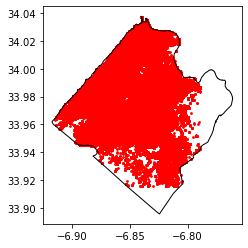

In [16]:

base = Provinces.boundary.plot(linewidth=1, edgecolor="black")
pnt_Rabat.plot(ax=base, linewidth=1, color="red", markersize=3)
plt.show()

In [26]:
pnt_Rabat.loc[pnt_Rabat.longitude>-6.81]

,device_id,latitude,longitude,datetime,hour,day,date,inside_circle,coords,Ville
68,NDBocW9wdnQ1azhoMjpiNjFnZDQxOWdwbDMz,33.984361,-6.809493,2021-06-24T08:45:05.000Z,8,24,2021-06-24,False,POINT (-6.80949 33.98436),Rabat
69,NDBocW9wdnQ1azhoMjpiNjFnZDQxOWdwbDMz,33.984361,-6.809493,2021-06-24T08:48:22.000Z,8,24,2021-06-24,False,POINT (-6.80949 33.98436),Rabat
178,NDdxaDQ2NTFuZXN0NjplY2oyb25kaWZmbmk=,33.936520,-6.808156,2021-06-24T00:39:40.000Z,0,24,2021-06-24,False,POINT (-6.80816 33.93652),Rabat
298,NWJnMzZoOHA5MDhtbjo2czVvdWNwYjRvNTB0,33.932997,-6.806355,2021-06-24T09:09:22.000Z,9,24,2021-06-24,False,POINT (-6.80635 33.93300),Rabat
299,NWJnMzZoOHA5MDhtbjo2czVvdWNwYjRvNTB0,33.932997,-6.806355,2021-06-24T09:21:33.000Z,9,24,2021-06-24,False,POINT (-6.80635 33.93300),Rabat
...,...,...,...,...,...,...,...,...,...,...
2021651,NDBocW9wdnQ1azhoMjpiNjFnZDQxOWdwbDMz,33.984283,-6.809819,2021-06-09T13:08:57.000Z,13,9,2021-06-09,False,POINT (-6.80982 33.98428),Rabat
2021652,NDBocW9wdnQ1azhoMjpiNjFnZDQxOWdwbDMz,33.984283,-6.809819,2021-06-09T13:07:24.000Z,13,9,2021-06-09,False,POINT (-6.80982 33.98428),Rabat
2021653,NDBocW9wdnQ1azhoMjpiNjFnZDQxOWdwbDMz,33.984283,-6.809819,2021-06-09T13:07:40.000Z,13,9,2021-06-09,False,POINT (-6.80982 33.98428),Rabat
2021737,MzQyY2p1dW9sa245YTpqOHY1aW90dXQzYmM=,33.984228,-6.809727,2021-06-09T08:17:12.000Z,8,9,2021-06-09,False,POINT (-6.80973 33.98423),Rabat


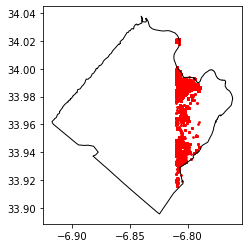

In [27]:

base = Provinces.boundary.plot(linewidth=1, edgecolor="black")
pnt_Rabat.loc[pnt_Rabat.longitude>-6.81].plot(ax=base, linewidth=1, color="red", markersize=3)
plt.show()

In [10]:
datageo

,device_id,latitude,longitude,datetime,hour,day,date,inside_circle,coords,Ville
0,NGcwcDlqYmpubmlncTo2MjRqdHM1bmdyZ3Fz,33.967102,-6.848767,2021-06-24T09:48:10.000Z,9,24,2021-06-24,True,POINT (-6.84877 33.96710),Rabat
1,MzhlN2pxdXR2dXMzbDo5ZmszZHQ3ZnI4bWRv,33.994609,-6.868181,2021-06-24T09:23:58.000Z,9,24,2021-06-24,True,POINT (-6.86818 33.99461),Rabat
2,MzhlN2pxdXR2dXMzbDo5ZmszZHQ3ZnI4bWRv,33.994609,-6.868181,2021-06-24T09:24:25.000Z,9,24,2021-06-24,True,POINT (-6.86818 33.99461),Rabat
3,MzhlN2pxdXR2dXMzbDo5ZmszZHQ3ZnI4bWRv,33.994609,-6.868181,2021-06-24T09:24:40.000Z,9,24,2021-06-24,True,POINT (-6.86818 33.99461),Rabat
4,MzhlN2pxdXR2dXMzbDo5ZmszZHQ3ZnI4bWRv,33.994609,-6.868181,2021-06-24T09:23:58.000Z,9,24,2021-06-24,True,POINT (-6.86818 33.99461),Rabat
...,...,...,...,...,...,...,...,...,...,...
2021982,M3Nwc2c4NTkzcjRobjo1NWE3djJ0bXVzbGp1,33.980554,-6.812003,2021-06-09T12:58:57.000Z,12,9,2021-06-09,False,POINT (-6.81200 33.98055),Rabat
2021983,M3Nwc2c4NTkzcjRobjo1NWE3djJ0bXVzbGp1,33.980554,-6.812003,2021-06-09T11:16:09.000Z,11,9,2021-06-09,False,POINT (-6.81200 33.98055),Rabat
2021984,MjhpOTloa25oOXBzNjpmNWlmMmo3ZXBuYm1i,33.981664,-6.887262,2021-06-09T09:32:15.000Z,9,9,2021-06-09,True,POINT (-6.88726 33.98166),Rabat
2021985,MWpvZjB2aHQ2aTllbzoxZ2c4a2RuMGxkMTE=,33.995022,-6.828325,2021-06-09T06:43:26.000Z,6,9,2021-06-09,True,POINT (-6.82833 33.99502),Rabat


In [11]:
datageo.to_csv('data/working/citydata/macro_table_citydata_rabat/CityData_Clean.csv', header=True)

In [ ]:
# import plotly.express as px 

# pandas_df=df

# fig = px.scatter_mapbox(pandas_df.loc[:10000,:], lat="latitude", lon="longitude", 
#                   size_max=15, zoom=10,
#                   mapbox_style="carto-positron")
# fig.show()

In [17]:
#les deviceId qui ont plus de 3 enregistrements dans une journée representent le nombre de personnes dont on peu suivre le mouvements durant n  une journée
df_tmp=datageo.groupby(['device_id','day']).count().reset_index()
list_deviceId=list(df_tmp.loc[df_tmp.latitude >3,'device_id'])

In [18]:
nv_data=datageo.loc[datageo.device_id.isin(list_deviceId)]


In [19]:
nv_data.fillna('Not_Rabat',inplace=True)
pnt_Rabat = nv_data[nv_data.Ville=='Rabat']
nv_data.Ville.value_counts()

C:\Users\salah\AppData\Local\Temp\ipykernel_13804\1769391537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nv_data.fillna('Not_Rabat',inplace=True)


Rabat        1809291
Not_Rabat     129080
Name: Ville, dtype: int64

In [ ]:

base = Provinces.boundary.plot(linewidth=1, edgecolor="black")
pnt_Rabat.plot(ax=base, linewidth=1, color="red", markersize=3)
plt.show()